### Введение.

Перед открытием оригинального небольшого кафе, необходимо подготовить исследование рынка о заведениях общественного питания в Москве и представить призентацию инвесторам.

Описание данных:

Таблица `rest_data`:
- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.


<a id="table_of_contents"></a>
#### Содержание:
* [Часть 1. Импорт библиотек и данных. Предобработка данных.](#step_1)
* [Часть 2. Анализ данных.](#step_2)
    * [2.1. Исследование количества объектов общественного питания по типу. Построение графика.](#step_2_1)
    * [2.2. Исследование соотношения сетевых и несетевых заведений по количеству. Построение график.](#step_2_2)
    * [2.3. Для какого вида объекта общественного питания характерно сетевое распространение?](#step_2_3)
    * [2.4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#step_2_4)
    * [2.5. Исследование среднего количества посадочных мест для каждого вида объекта общественного питания . Какой вид предоставляет в среднем большее количество посадочных мест? Графики.](#step_2_5)
    * [2.6. Запись в отдельный столбец информации об улице из столбца `address`.](#step_2_6)
    * [2.7. Построение графика: топ-10 улиц по количеству объектов общественного питания. Вывод информации о районах Москвы, в которых находятся эти улицы.](#step_2_7)
    * [2.8. Поиск улиц с одним объектом общественного питания. Вывод информации о районах Москвы, в которых находятся эти улицы.](#step_2_8)
    * [2.9. Распределение количества посадочных мест в объектах общественного питания по улицам из Топ-10. Выявление закономерностей. Выявление закономерностей.](#step_2_9)
* [Часть 3. Презентация.](#step_3)
* [Итог.](#step_total)

<a id="step_1"></a>
### Часть 1. Импорт библиотек и данных. Предобработка данных.
[К содержанию](#table_of_contents)

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import requests
from io import BytesIO

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', -1)

In [2]:
# функция чтения данных из google sheets
def data_from_g_sheets(spreadsheet_id):
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
    r = requests.get(file_name)
    return pd.read_csv(BytesIO(r.content))

In [3]:
try:
    
    rest_data = pd.read_csv('/datasets/rest_data.csv')
    moscow_buildings = data_from_g_sheets('1rxPlZsWkab_-KvpU3WkMRbbvly6skS8JtBS0c_lmpAA')
        
except:
    
    rest_data = data_from_g_sheets('1NMZXE-2JMvWLjOSkO7ac5oBmgtAzLUJeYZwJZUfwbsM')
    moscow_buildings = data_from_g_sheets('1rxPlZsWkab_-KvpU3WkMRbbvly6skS8JtBS0c_lmpAA')

In [4]:
display(rest_data.head(10))

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120


In [5]:
display(rest_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

Замена типа данных в столбце id с int64 на object (для исключения арифметических действий над данными столбца):

In [6]:
rest_data['id'] = rest_data['id'].astype('object')

Замена верхнего регистра на нижний в данных столбцов object_name и address:

In [7]:
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()
#display(rest_data['chain'].value_counts())

Замена длинных названий в столбце `object_type` на более короткие:

In [8]:
rest_data['object_type'] = rest_data['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
rest_data['object_type'] = rest_data['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинарный отдел')
display(rest_data['object_type'].value_counts())

кафе                6099
столовая            2587
ресторан            2285
фаст-фуд            1923
бар                 856 
буфет               585 
кафетерий           398 
закусочная          360 
кулинарный отдел    273 
Name: object_type, dtype: int64

Замена в столбце `chain` значений "да" / "нет" на "сетевое" / "несетевое"

In [9]:
rest_data['chain'] = rest_data['chain'].str.replace('да', 'сетевое')
rest_data['chain'] = rest_data['chain'].str.replace('нет', 'несетевое')
display(rest_data.head(10))

,id,object_name,chain,object_type,address,number
0,151635,сметана,несетевое,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,несетевое,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,несетевое,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,сетевое,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,несетевое,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
5,27429,стол. при гоу сош № 1051,несетевое,столовая,"город москва, абрамцевская улица, дом 15, корпус 1",240
6,148815,брусника,сетевое,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
7,20957,буфет мтуси,несетевое,столовая,"город москва, авиамоторная улица, дом 8, строение 1",90
8,20958,кпф семья-1,несетевое,столовая,"город москва, авиамоторная улица, дом 8, строение 1",150
9,28858,столовая мтуси,несетевое,столовая,"город москва, авиамоторная улица, дом 8, строение 1",120


In [10]:
print('Количество дубликатов в таблице rest_data:', rest_data.duplicated().sum())

Количество дубликатов в таблице rest_data: 0


Проверка частичных дублей, игнорируем столбцы: `id` и `number`:

In [11]:
rest_data.duplicated(subset=['object_name', 'chain', 'object_type', 'address']).sum()

183

In [12]:
rest_data[rest_data.duplicated(subset=['object_name', 'chain', 'object_type', 'address']) == True].head(5)

,id,object_name,chain,object_type,address,number
115,28614,комбинат питания мгту им.н.э.баумана,несетевое,буфет,"город москва, бригадирский переулок, дом 3-5",12
580,149205,общественное питание,несетевое,кафе,"город москва, павелецкая площадь, дом 1",35
581,149131,общественное питание,несетевое,кафе,"город москва, павелецкая площадь, дом 1",39
1409,151267,альфорно,несетевое,кафе,"город москва, город зеленоград, корпус 438",45
2375,28604,комбинат питания мгту им.н.э.баумана,несетевое,столовая,"город москва, 2-я бауманская улица, дом 5, строение 1",150


Удаляем частичные дубли:

In [13]:
rest_data = rest_data.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address'])

In [14]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15183 entries, 0 to 15364
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15183 non-null  object
 1   object_name  15183 non-null  object
 2   chain        15183 non-null  object
 3   object_type  15183 non-null  object
 4   address      15183 non-null  object
 5   number       15183 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 830.3+ KB


<a id = "step_2"></a>
### Часть 2. Анализ данных.
[К содержанию](#table_of_contents)

<a id = "step_2_1"></a>
##### 2.1. Исследование количества объектов общественного питания по типу. Построение графика.
[К содержанию](#table_of_contents)

In [15]:
display(rest_data['object_type'].value_counts().reset_index())

,index,object_type
0,кафе,6008
1,столовая,2575
2,ресторан,2275
3,фаст-фуд,1890
4,бар,853
5,буфет,570
6,кафетерий,393
7,закусочная,347
8,кулинарный отдел,272


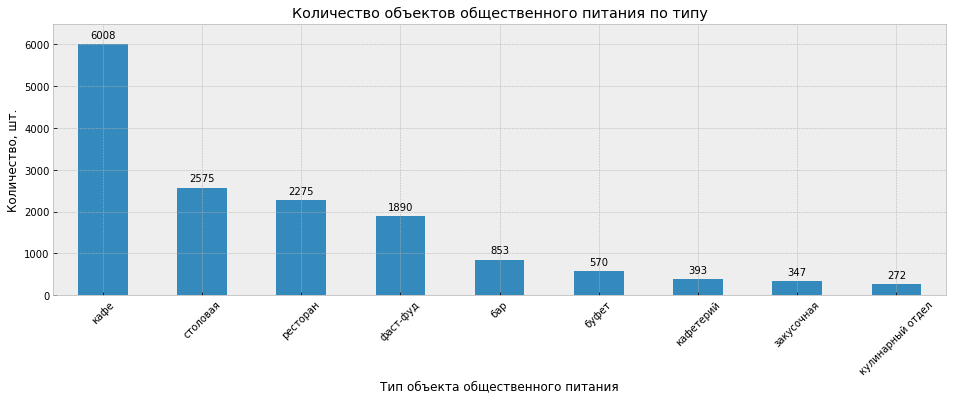

In [16]:
plt.style.use('bmh')
plt.figure(figsize = (16, 5))
plt.title('Количество объектов общественного питания по типу')
plt.xlabel('Тип объекта общественного питания')
plt.ylabel('Количество, шт.')
tmp01 = rest_data['object_type'].value_counts().plot(kind = 'bar')
for p in tmp01.patches:
    tmp01.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
tmp01.set_ylim(0, 6500)    
plt.xticks(rotation = 45) 
plt.show()

##### 2.1. Вывод.

Наиболее распространенный тип объекта общественного питания - кафе, затем: столовая и ресторан. Кулинарный отдел наименее растпространенный тип объекта общественного питания.

<a id = "step_2_2"></a>
##### 2.2. Исследование соотношения сетевых и несетевых заведений по количеству. Построение график.
[К содержанию](#table_of_contents)

In [17]:
display(rest_data['chain'].value_counts().reset_index())

,index,chain
0,несетевое,12234
1,сетевое,2949


In [18]:
tmp02 = rest_data.groupby(['object_type', 'chain']).count().reset_index()

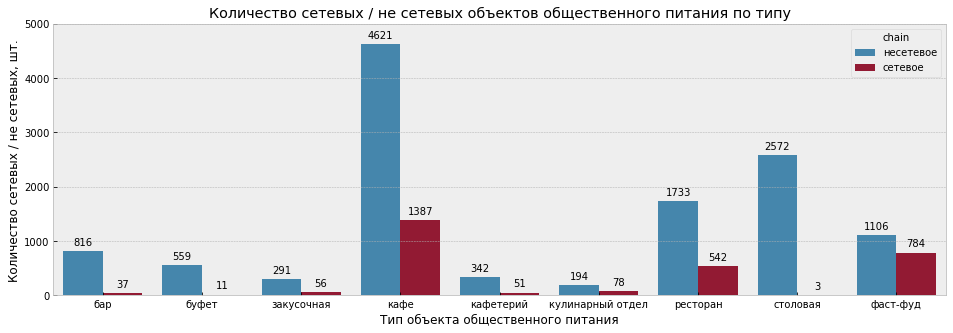

In [19]:
plt.figure(figsize = (16, 5))
plt.title('Количество сетевых / не сетевых объектов общественного питания по типу')
tmp03 = sns.barplot(x = 'object_type', y = 'id', hue = 'chain', data = tmp02) 
for p in tmp03.patches:
    tmp03.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
tmp03.set_ylim(0, 5000)
plt.xlabel('Тип объекта общественного питания')
plt.ylabel('Количество сетевых / не сетевых, шт.')
plt.show()

##### 2.2. Вывод.

В целом, несетевых объектов общественного питания более чем в 4 раза больше, чем сетевых.

<a id = "step_2_3"></a>
##### 2.3. Для какого вида объекта общественного питания характерно сетевое распространение?
[К содержанию](#table_of_contents)

In [20]:
tmp04 = rest_data['object_type'].value_counts().reset_index()
rest_data_chein = rest_data.query('chain == "сетевое"')
tmp05 = rest_data_chein['object_type'].value_counts().reset_index()

In [21]:
tmp06 = pd.merge(tmp04, tmp05, on = 'index')
tmp06['percent'] = (tmp06['object_type_y'] / tmp06['object_type_x'] * 100).round(2)
tmp06 = tmp06.sort_values('percent', ascending = False).reset_index()
tmp06[['index', 'percent']]

,index,percent
0,фаст-фуд,41.48
1,кулинарный отдел,28.68
2,ресторан,23.82
3,кафе,23.09
4,закусочная,16.14
5,кафетерий,12.98
6,бар,4.34
7,буфет,1.93
8,столовая,0.12


##### 2.3. Вывод.

Наиболее характерно сетевое распространение для такого типа общественного питания, как: фаст-фуд - 41% от всех объектов данного типа - сетевые. Наименее: столовая - менее процента сетевых.

<a id = "step_2_4"></a>
##### 2.4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
[К содержанию](#table_of_contents)

In [22]:
rest_data_chein['number'].describe(include='all').round(2)

count    2949.00
mean     53.00  
std      57.22  
min      0.00   
25%      15.00  
50%      40.00  
75%      72.00  
max      580.00 
Name: number, dtype: float64

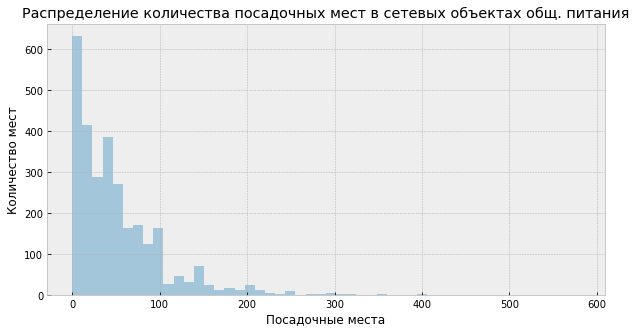

In [23]:
plt.figure(figsize = (10, 5))
plt.title('Распределение количества посадочных мест в сетевых объектах общ. питания')
plt.ylabel('Количество мест')
sns.distplot(rest_data_chein['number'], bins = 50, kde = False) 
plt.xlabel('Посадочные места')
plt.show()

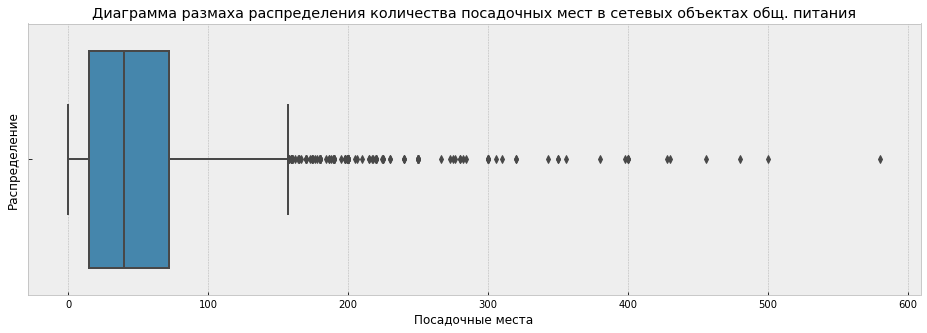

In [24]:
plt.figure(figsize = (16, 5))
plt.title('Диаграмма размаха распределения количества посадочных мест в сетевых объектах общ. питания')
plt.ylabel('Распределение')
sns.boxplot(x = 'number', data = rest_data_chein)
plt.xlabel('Посадочные места')
plt.show()

Отношение среднего количества посадочных мест к размеру сети общественного питания:

In [25]:
rest_data_chein_scatter = rest_data_chein.groupby('object_type')\
                                .agg({'object_type' : 'count', 'number' : 'mean'}).astype('int64')
rest_data_chein_scatter.columns = ['object_size', 'seats_mean']

In [26]:
rest_data_chein_scatter = rest_data_chein_scatter.reset_index()

In [27]:
rest_data_chein_scatter

,object_type,object_size,seats_mean
0,бар,37,53
1,буфет,11,12
2,закусочная,56,14
3,кафе,1387,47
4,кафетерий,51,12
5,кулинарный отдел,78,8
6,ресторан,542,100
7,столовая,3,112
8,фаст-фуд,784,40



Отношение среднего количества посадочных мест к размеру сети общественного питания:


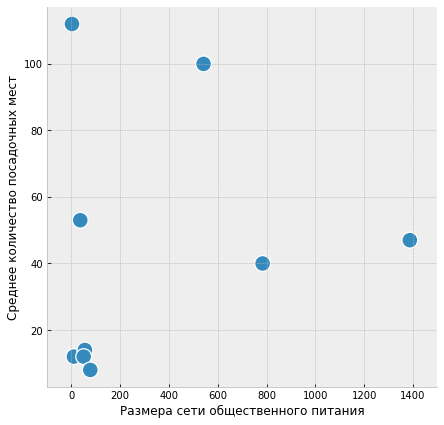

In [28]:
print('')
print('Отношение среднего количества посадочных мест к размеру сети общественного питания:')
f, ax = plt.subplots(figsize=(7, 7))
sns.despine(f)
ax.set_title('')
sns.scatterplot(data = rest_data_chein_scatter, x = 'object_size', 
                y = 'seats_mean', palette = 'deep',
                size = 'object_size', sizes = (250, 250), legend = False, ax = ax) #hue = 'object_type',
ax.set_xlim(-100, 1500)
ax.set_xlabel('Размера сети общественного питания')
ax.set_ylabel('Среднее количество посадочных мест')
plt.show()

##### 2.4. Вывод.

Для сетевых заведений более характерно: много заведений с небольшим числом посадочных мест в каждом.

<a id = "step_2_5"></a>
##### 2.5. Исследование среднего количества посадочных мест для каждого вида объекта общественного питания . Какой вид предоставляет в среднем большее количество посадочных мест? Графики.
[К содержанию](#table_of_contents)

In [29]:
mean_seats = rest_data.groupby('object_type')['number'].mean().astype('int64').sort_values(ascending = False).reset_index()
mean_seats

,object_type,number
0,столовая,130
1,ресторан,97
2,буфет,51
3,бар,43
4,кафе,39
5,фаст-фуд,20
6,кафетерий,9
7,закусочная,7
8,кулинарный отдел,5


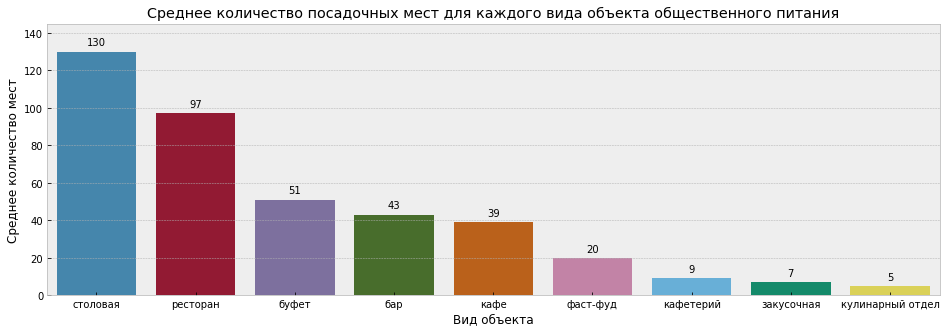

In [30]:
plt.figure(figsize = (16, 5))
plt.title('Cреднее количество посадочных мест для каждого вида объекта общественного питания')
mean_seats_bar = sns.barplot(x = 'object_type', y = 'number', data = mean_seats)
for p in mean_seats_bar.patches:
    mean_seats_bar.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
mean_seats_bar.set_ylim(0, 145)
plt.ylabel('Среднее количество мест')
plt.xlabel('Вид объекта')
plt.show()

##### 2.5. Вывод.

В среднем, самое большое количество посадочных мест предоставляют такие виды общественного питания как: столовая и ресторан. Наименее - закусочная и кулинарный отдет.

<a id = "step_2_6"></a>
##### 2.6. Запись в отдельный столбец информации об улице из столбца `address` .
[К содержанию](#table_of_contents)

In [31]:
rest_data['streets'] = rest_data['address'].str.extract('(([А-яё0-9-\s]+)?(улица|переулок|шоссе|площадь\
                                                        |проспект|проезд|бульвар|набережная|микрорайон\
                                                        |аллея|квартал|линия|тупик)([А-яё0-9-\s]+)?)')[0]
rest_data['streets'] = rest_data['streets'].str.strip()
#rest_data.head()

In [32]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15183 entries, 0 to 15364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15183 non-null  object
 1   object_name  15183 non-null  object
 2   chain        15183 non-null  object
 3   object_type  15183 non-null  object
 4   address      15183 non-null  object
 5   number       15183 non-null  int64 
 6   streets      14429 non-null  object
dtypes: int64(1), object(6)
memory usage: 948.9+ KB


In [33]:
rest_data.head(5)

,id,object_name,chain,object_type,address,number,streets
0,151635,сметана,несетевое,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,несетевое,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,несетевое,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,сетевое,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,несетевое,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


##### 2.6. Вывод.

Столбец с названиями улиц: `streets` - добавлен.

<a id = "step_2_7"></a>
##### 2.7. Построение графика: топ-10 улиц по количеству объектов общественного питания. Вывод информации о районах Москвы, в которых находятся эти улицы.
[К содержанию](#table_of_contents)

In [34]:
top_10_streets = rest_data['streets'].value_counts().head(10).reset_index()
top_10_streets

,index,streets
0,проспект мира,196
1,профсоюзная улица,181
2,ленинградский проспект,172
3,пресненская набережная,165
4,варшавское шоссе,163
5,ленинский проспект,148
6,проспект вернадского,126
7,кутузовский проспект,114
8,каширское шоссе,110
9,кировоградская улица,107


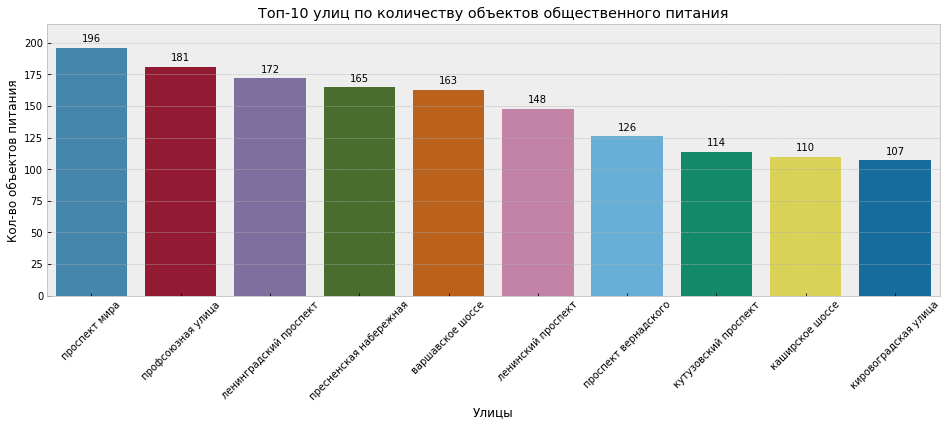

In [35]:
plt.figure(figsize = (16, 5))
plt.title('Топ-10 улиц по количеству объектов общественного питания')
top_10_streets_bar = sns.barplot(x = 'index', y = 'streets', data = top_10_streets)
for p in top_10_streets_bar.patches:
    top_10_streets_bar.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel('Кол-во объектов питания')
plt.xlabel('Улицы')
top_10_streets_bar.set_ylim(0, 215)
plt.xticks(rotation = 45) 
plt.show()

Улицы по районам Москвы:
    
1. Проспект Мира: Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино;
2. Профсоюзная улица: Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево;
3. Ленинградский проспект: Беговой, Аэропорт, Сокол, Хорошёвский;
4. Пресненская набережная: Пресненский;
5. Варшавское шоссе: Донской, Нагатино-Садовники, Нагорный, Чертаново Северное, Чертаново Центральное, Чертаново Южное, Южное Бутово, Щербинка;
6. Ленинский проспект: Якиманка, Донской, Гагаринский, Ломоносовский, Обручевский, Тёплый Стан, Проспект Вернадского, Тропарёво-Никулино;
7. Проспект Вернадского: Гагаринский, Ломоносовский, Раменки, Проспект Вернадского, Тропарёво-Никулино;
8. Кутузовский проспект: Дорогомилово, Фили-Давыдково;
9. Каширское шоссе: Москворечье-Сабурово, Орехово-Борисово Северное, Орехово-Борисово Южное, Нагатино-Садовники;
10. Ходынский бульвар: Хорошёвский.

In [36]:
moscow_buildings['street_brief'] = moscow_buildings['street_name'].str.lower().str.strip()
moscow_buildings['area_name'] = moscow_buildings['area_name'].str.replace('муниципальный округ', '').str.strip()

In [37]:
area_data = rest_data.copy()[['streets']]
area_data['street_brief'] = area_data['streets'].str.replace('улица|переулок|шоссе|площадь|проспект|проезд|бульвар\
                                                    |набережная|микрорайон|аллея|квартал|линия|тупик', '').str.strip()
area_data = pd.merge(area_data, moscow_buildings[['street_brief', 'area_name']], on = ['street_brief'], how = 'left')

In [38]:
top_10_streets_list = top_10_streets['index'].to_list()
top_10_streets_area = area_data.query('streets == @top_10_streets_list')
top_10_streets_area.groupby(['streets', 'area_name']).agg({'area_name' : 'unique'}).drop(['area_name'], axis=1)

Empty DataFrame
Columns: []
Index: [(варшавское шоссе, Донской), (варшавское шоссе, Нагатино-Садовники), (варшавское шоссе, Нагорный), (варшавское шоссе, Чертаново Северное), (варшавское шоссе, Чертаново Центральное), (варшавское шоссе, Чертаново Южное), (варшавское шоссе, Южное Бутово), (каширское шоссе, Москворечье-Сабурово), (каширское шоссе, Нагатино-Садовники), (каширское шоссе, Орехово-Борисово Северное), (каширское шоссе, Орехово-Борисово Южное), (кировоградская улица, Чертаново Северное), (кировоградская улица, Чертаново Центральное), (кировоградская улица, Чертаново Южное), (кутузовский проспект, Дорогомилово), (кутузовский проспект, Фили-Давыдково), (ленинградский проспект, Аэропорт), (ленинградский проспект, Беговой), (ленинградский проспект, Сокол), (ленинградский проспект, Хорошевский), (ленинградский проспект, Чертаново Северное), (ленинский проспект, Гагаринский), (ленинский проспект, Донской), (ленинский проспект, Ломоносовский), (ленинский проспект, Обручевский), (ленинский проспект, Проспект Вернадского), (ленинский проспект, Теплый Стан), (ленинский проспект, Тропарево-Никулино), (ленинский проспект, Якиманка), (проспект вернадского, Гагаринский), (проспект вернадского, Ломоносовский), (проспект вернадского, Проспект Вернадского), (проспект вернадского, Тропарево-Никулино), (проспект мира, Алексеевский), (проспект мира, Мещанский), (проспект мира, Останкинский), (проспект мира, Ростокино), (профсоюзная улица, Академический), (профсоюзная улица, Коньково), (профсоюзная улица, Обручевский), (профсоюзная улица, Теплый Стан), (профсоюзная улица, Черемушки), (профсоюзная улица, Ясенево)]

##### 2.7. Вывод.

Проспект Мира является наиболее популярным среди объектов общественного питания. Возможно, это связано с протяженностью + улица пересекает много районов, как и большинство других улиц из Топ.

<a id = "step_2_8"></a>
##### 2.8. Поиск улиц с одним объектом общественного питания. Вывод информации о районах Москвы, в которых находятся эти улицы.
[К содержанию](#table_of_contents)

In [39]:
behind_streets = rest_data['streets'].value_counts().reset_index()

In [40]:
behind_streets = behind_streets.query('streets == 1')

In [41]:
behind_streets_list = behind_streets['index'].to_list()
behind_streets_area = area_data.query('streets == @behind_streets_list')
#behind_streets_area[['streets', 'area_name']]
behind_streets_area = behind_streets_area.drop_duplicates(subset=['streets', 'area_name'])

In [42]:
behind_streets_area[['streets', 'area_name']].count()

streets      553
area_name    297
dtype: int64

In [43]:
behind_streets_area[['streets', 'area_name']].head(10)

,streets,area_name
422,филипповский переулок,Арбат
1684,бабаевская улица,Сокольники
2001,1-й балтийский переулок,NaN
2186,улица демьяна бедного,Хорошево-Мневники
3179,будайская улица,Ростокино
3697,варсонофьевский переулок,Мещанский
5816,верхняя улица,Беговой
5823,глазовский переулок,Арбат
5824,глазовский переулок,Хамовники
8312,воротниковский переулок,Тверской


##### 2.8. Вывод.

Всего 553 улиц, на которых расположено по одному объекту общественного питания.

<a id = "step_2_9"></a>
##### 2.9. Распределение количества посадочных мест в объектах общественного питания по улицам из Топ-10. Выявление закономерностей.
[К содержанию](#table_of_contents)

In [44]:
streets_name = top_10_streets['index'].to_list()

In [45]:
top_10_streets_chain = rest_data.query('streets == @streets_name')

In [46]:
top_10_streets_chain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 151 to 15358
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1482 non-null   object
 1   object_name  1482 non-null   object
 2   chain        1482 non-null   object
 3   object_type  1482 non-null   object
 4   address      1482 non-null   object
 5   number       1482 non-null   int64 
 6   streets      1482 non-null   object
dtypes: int64(1), object(6)
memory usage: 92.6+ KB


In [47]:
top_10_streets_chain['number'].describe().round(2)

count    1482.00
mean     58.39  
std      90.51  
min      0.00   
25%      12.00  
50%      40.00  
75%      75.00  
max      1700.00
Name: number, dtype: float64

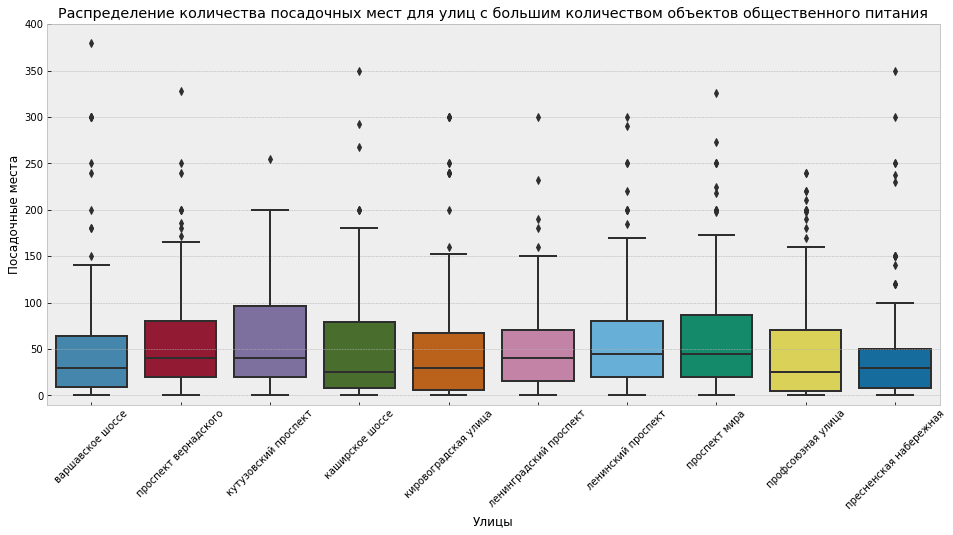

In [48]:
plt.figure(figsize = (16, 7))
plt.title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания')
top_10_streets_chain_boxplot = sns.boxplot(x = 'streets', y= 'number', data = top_10_streets_chain)
top_10_streets_chain_boxplot.set_ylim(-10,400)
plt.ylabel('Посадочные места')
plt.xlabel('Улицы')
plt.xticks(rotation = 45) 
plt.show()

##### 2.9. Вывод.

Несмотря на то, что объекты общественного питания более всего сконцентрированны на данных улицах (топ-10), посадочных мест в заведениях в среднем не много.

<a id="step_3"></a>
### Часть 3. Презентация.
[К содержанию](#table_of_contents)

Презентация: https://drive.google.com/file/d/1LNCW4ycnywA1iTIPpkVM6NfKGGQaOuZQ/view?usp=sharing

<a id = "step_total"></a>
### Итог.
[К содержанию](#table_of_contents)



Наиболее приоритетным для открытия объектом общественного питания является - кафе, так же популярны: столовая и ресторан. Наиболее перспективные улицы для открытия объектов общественного питания: Проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, Проспект Вернадского, Кутузовский проспект, Каширское шоссе, Ходынский бульвар. Для указанных улиц, типичное количество посадочных мест для объекта общественного питания составляет 35. В то время как для кафе, столовой и ресторана характерно 39, 130 и 96 посадочных мест соответственно. Доля сетевых объектов в своем типе: фаст-фуд - 41%, кулинарный отдел - 28%, ресторан - 24%, кафе - 23%. Столовая является самым несетевым объектом общественного питания.

В соответствии с полученными результатами исследования рынка  объектов общественного питания в Москве, проекту «Робо-кафе» подготовлены следующие рекомендации:

- формат заведения: несетевое кафе (в дальнейшем, можно подумать о расширении);
- количество мест: 35 - 39;
- расположение: желательно - Проспект Мира, но так же можно рассмотреть: Профсоюзная улица, Ленинградский проспект.

In [49]:
top_10_streets.columns = ['street_name', 'object_count']
top_10_streets['street_length'] = [8900, 9300, 5600, 550, 22500, 16000, 8000, 8300, 10500, 4300]

In [50]:
top_10_streets['metr_obj'] = (top_10_streets['street_length'] / top_10_streets['object_count']).astype('int')

In [51]:
top_10_streets.sort_values(by = 'metr_obj')

,street_name,object_count,street_length,metr_obj
3,пресненская набережная,165,550,3
2,ленинградский проспект,172,5600,32
9,кировоградская улица,107,4300,40
0,проспект мира,196,8900,45
1,профсоюзная улица,181,9300,51
6,проспект вернадского,126,8000,63
7,кутузовский проспект,114,8300,72
8,каширское шоссе,110,10500,95
5,ленинский проспект,148,16000,108
4,варшавское шоссе,163,22500,138


[Назад](#table_of_contents_2)